In [17]:
#rlogistic regression DONE!!!
import pandas as pd
import datetime 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report,confusion_matrix  #to be used in statistics and also accuracy
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
#sns.set(style=whitegrid, color_codes=True)


data = pd.read_excel(r'Dropbox/Project personal(400)/DATA FOR COMPUTER SCIENCE STUDENT NEW.xls',sheet_name='INACTIVE EMPLOYEES',  parse_date={'Expire Date'})

#eliminating attributes not needed
data = data.drop(['Personnel Number','Country Name','Birth Date','Age.1'],axis=1)
print(data.shape)
print(data.head())
data.dtypes

(4329, 9)
  Gnd Marital Status  Age Ethnic Group Name           Post Name  \
0   M              S   60     GREATER ACCRA     SENIOR LECTURER   
1   M              S   61           CENTRAL     SENIOR LECTURER   
2   M              M   53           ASHANTI     SENIOR LECTURER   
3   F              S   39           EASTERN            LECTURER   
4   M              S   36           EASTERN  PART-TIME LECTURER   

               Appt. Type                 Department Name Expire Date  \
0  SENIOR MEMBER ACADEMIC                MODERN LANGUAGES  2005-08-01   
1  SENIOR MEMBER ACADEMIC                MODERN LANGUAGES  1997-10-01   
2  SENIOR MEMBER ACADEMIC  DEPT. OF NUTRITION & FOOD SCI.  2016-01-01   
3  SENIOR MEMBER ACADEMIC    POP.FAMILY & REPR.HEALTH-SPH  2006-08-01   
4  SENIOR MEMBER ACADEMIC                           ISSER  2002-08-01   

  Reason for Separation  
0            RETIREMENT  
1            RETIREMENT  
2  VOLUNTARY RETIREMENT  
3              RESIGNED  
4      VACATION OF

Gnd                              object
Marital Status                   object
Age                               int64
Ethnic Group Name                object
Post Name                        object
Appt. Type                       object
Department Name                  object
Expire Date              datetime64[ns]
Reason for Separation            object
dtype: object

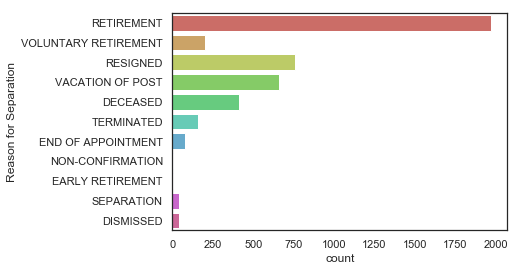

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 9 columns):
Gnd                      4329 non-null object
Marital Status           4329 non-null object
Age                      4329 non-null int64
Ethnic Group Name        4329 non-null object
Post Name                4329 non-null object
Appt. Type               4329 non-null object
Department Name          4329 non-null object
Expire Date              4329 non-null datetime64[ns]
Reason for Separation    4329 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 304.5+ KB


<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(y='Reason for Separation', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')
data.info()

In [19]:
#finding the correlation
data.count()
data.groupby('Reason for Separation').mean()
#from the meann grouping below, it is evident that most employees retired due to their age
#followed by those who requested for an early retirement before voluntary retirement
#conclusion: this shows that most employees from the University retired as compared to the other factors under reason of termination.

,Age
Reason for Separation,
DECEASED,49.220339
DISMISSED,36.051282
EARLY RETIREMENT,56.000000
END OF APPOINTMENT,41.657895
NON-CONFIRMATION,42.800000
RESIGNED,35.477573
RETIREMENT,60.241641
SEPARATION,36.300000
TERMINATED,40.125000


In [20]:
data['Expire Date'] = pd.to_datetime(data['Expire Date'])
data['year'], data['month'],data['day'] = data['Expire Date'].dt.year, data['Expire Date'].dt.month, data['Expire Date'].dt.day
data.head()

,Gnd,Marital Status,Age,Ethnic Group Name,Post Name,Appt. Type,Department Name,Expire Date,Reason for Separation,year,month,day
0,M,S,60,GREATER ACCRA,SENIOR LECTURER,SENIOR MEMBER ACADEMIC,MODERN LANGUAGES,2005-08-01,RETIREMENT,2005,8,1
1,M,S,61,CENTRAL,SENIOR LECTURER,SENIOR MEMBER ACADEMIC,MODERN LANGUAGES,1997-10-01,RETIREMENT,1997,10,1
2,M,M,53,ASHANTI,SENIOR LECTURER,SENIOR MEMBER ACADEMIC,DEPT. OF NUTRITION & FOOD SCI.,2016-01-01,VOLUNTARY RETIREMENT,2016,1,1
3,F,S,39,EASTERN,LECTURER,SENIOR MEMBER ACADEMIC,POP.FAMILY & REPR.HEALTH-SPH,2006-08-01,RESIGNED,2006,8,1
4,M,S,36,EASTERN,PART-TIME LECTURER,SENIOR MEMBER ACADEMIC,ISSER,2002-08-01,VACATION OF POST,2002,8,1


In [21]:
data = data.drop(['Expire Date'], axis=1)
#data.dtypes['Expire Date'] = pd.to_datetime(data['Expire Date'])
data.dtypes

Gnd                      object
Marital Status           object
Age                       int64
Ethnic Group Name        object
Post Name                object
Appt. Type               object
Department Name          object
Reason for Separation    object
year                      int64
month                     int64
day                       int64
dtype: object

In [22]:
numeric_data = list(data.dtypes[data.dtypes != "object"].index)
X1 = data[numeric_data]
print(X1.head())
X1.shape

   Age  year  month  day
0   60  2005      8    1
1   61  1997     10    1
2   53  2016      1    1
3   39  2006      8    1
4   36  2002      8    1


(4329, 4)

In [23]:
data.groupby('Reason for Separation').count()
#from the count results below,  its evident that employees who retired are the most in the dataset , followed by those who resigned.
#vacation of post also gave the third highest number of employees in from the dataset.
# The least number of employees from the reason for separation was for those that were non-confirmed
#All other forms of retirement(early retirement and voluntary retirement) will be classified under retirement.

,Gnd,Marital Status,Age,Ethnic Group Name,Post Name,Appt. Type,Department Name,year,month,day
Reason for Separation,,,,,,,,,,
DECEASED,413,413,413,413,413,413,413,413,413,413
DISMISSED,39,39,39,39,39,39,39,39,39,39
EARLY RETIREMENT,1,1,1,1,1,1,1,1,1,1
END OF APPOINTMENT,76,76,76,76,76,76,76,76,76,76
NON-CONFIRMATION,5,5,5,5,5,5,5,5,5,5
RESIGNED,758,758,758,758,758,758,758,758,758,758
RETIREMENT,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974
SEPARATION,40,40,40,40,40,40,40,40,40,40
TERMINATED,160,160,160,160,160,160,160,160,160,160


In [24]:
#Classification of Reason for Separation
data['Reason for Separation']=np.where(data['Reason for Separation']=='EARLY RETIREMENT','RETIREMENT',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='VOLUNTARY RETIREMENT','RETIREMENT',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='SEPARATION','RESIGNED',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='VACATION OF POST','RESIGNED',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='DISMISSED','TERMINATED',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='NON-CONFIRMATION','TERMINATED',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='DECEASED','TERMINATED',data['Reason for Separation'])
data['Reason for Separation']=np.where(data['Reason for Separation']=='END OF APPOINTMENT','TERMINATED',data['Reason for Separation'])
data.groupby('Reason for Separation').count()



,Gnd,Marital Status,Age,Ethnic Group Name,Post Name,Appt. Type,Department Name,year,month,day
Reason for Separation,,,,,,,,,,
RESIGNED,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
RETIREMENT,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177
TERMINATED,693,693,693,693,693,693,693,693,693,693


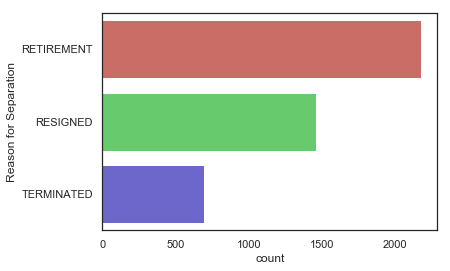

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 11 columns):
Gnd                      4329 non-null object
Marital Status           4329 non-null object
Age                      4329 non-null int64
Ethnic Group Name        4329 non-null object
Post Name                4329 non-null object
Appt. Type               4329 non-null object
Department Name          4329 non-null object
Reason for Separation    4329 non-null object
year                     4329 non-null int64
month                    4329 non-null int64
day                      4329 non-null int64
dtypes: int64(4), object(7)
memory usage: 372.1+ KB


<Figure size 432x288 with 0 Axes>

In [25]:
sns.countplot(y='Reason for Separation', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')
data.info()

In [26]:
#data.groupby('Department Name').count()
data = data.drop(['Department Name'], axis=1)
#data.dtypes['Expire Date'] = pd.to_datetime(data['Expire Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 10 columns):
Gnd                      4329 non-null object
Marital Status           4329 non-null object
Age                      4329 non-null int64
Ethnic Group Name        4329 non-null object
Post Name                4329 non-null object
Appt. Type               4329 non-null object
Reason for Separation    4329 non-null object
year                     4329 non-null int64
month                    4329 non-null int64
day                      4329 non-null int64
dtypes: int64(4), object(6)
memory usage: 338.3+ KB


In [27]:
#isolating the target variable
Y_raw = data.pop("Reason for Separation")
#creating dummmy variables of target
Y = pd.get_dummies(Y_raw)
print(Y.head())
#info()
Y.shape

   RESIGNED  RETIREMENT  TERMINATED
0         0           1           0
1         0           1           0
2         0           1           0
3         1           0           0
4         1           0           0


(4329, 3)

In [28]:
X1_train,X1_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=42)
print(X1_test.shape)
print(X1_train.shape)
print(Y_test.shape)
print(Y_train.shape)


(866, 4)
(3463, 4)
(866, 3)
(3463, 3)


In [38]:
standard_X = StandardScaler()
X1_train = standard_X.fit_transform(X1_train)
X1_test = standard_X.fit_transform(X1_test)

C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
model = Pipeline([('clf',
                             OneVsRestClassifier(LogisticRegression(solver = 'lbfgs',random_state=42),n_jobs = -1)),
                           ])
#model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
model.fit(X1_train,Y_train)
model_predictions =model.predict(X1_test)
count_misclassified = (Y_test != model_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified))
#print(classification_report(Y,model_predictions))
print("Accuracy : ", accuracy_score(Y_test,model_predictions))
print ("c-stat:", roc_auc_score(Y_test,model_predictions))
print(classification_report(Y_test,model_predictions))
unique_label = np.unique(Y_test)
print(confusion_matrix(Y_test.values.argmax(axis=1),model_predictions.argmax(axis=1)))

#pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Misclassified samples: RESIGNED      108
RETIREMENT     61
TERMINATED    121
dtype: int64
Accuracy :  0.7702078521939953
c-stat: 0.760092358676662
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       291
           1       0.91      0.97      0.94       454
           2       0.00      0.00      0.00       121

   micro avg       0.88      0.77      0.82       866
   macro avg       0.58      0.58      0.58       866
weighted avg       0.76      0.77      0.76       866
 samples avg       0.77      0.77      0.77       866

[[279  12   0]
 [ 15 439   0]
 [ 87  34   0]]


C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predi

In [30]:
categorical_data = list(data.dtypes[data.dtypes == "object"].index)
#creating dummy variables.
X2 = pd.get_dummies(data[categorical_data])
print(X2.head())


   Gnd_F  Gnd_M  Marital Status_D  Marital Status_M  Marital Status_S  \
0      0      1                 0                 0                 1   
1      0      1                 0                 0                 1   
2      0      1                 0                 1                 0   
3      1      0                 0                 0                 1   
4      0      1                 0                 0                 1   

   Marital Status_W  Ethnic Group Name_AMERICAS  Ethnic Group Name_ASHANTI  \
0                 0                           0                          0   
1                 0                           0                          0   
2                 0                           0                          1   
3                 0                           0                          0   
4                 0                           0                          0   

   Ethnic Group Name_ASIA  Ethnic Group Name_BRONG AHAFO  ...  \
0                       0  

In [31]:
X = pd.concat([X1,X2],axis = 1)
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
X.head()

,Age,year,month,day,Gnd_F,Gnd_M,Marital Status_D,Marital Status_M,Marital Status_S,Marital Status_W,...,Post Name_VISITING SCHOLAR,Post Name_WARD ASSISTANT,Post Name_WATCHMAN,Post Name_WORKS ATTENDANT,Post Name_WORKS SUPERINTENDENT,Appt. Type_JUNIOR STAFF,Appt. Type_SENIOR MEMBER ACADEMIC,Appt. Type_SENIOR MEMBER ADMINISTRATIVE,Appt. Type_SENIOR STAFF,Appt. Type_TEACHING ASSISTANT
0,60,2005,8,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,61,1997,10,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,53,2016,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,39,2006,8,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,36,2002,8,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
Logreg_pipeline = Pipeline([('clf',
                             OneVsRestClassifier(LogisticRegression(C = 10, solver = 'sag',random_state=42, max_iter = 1000),n_jobs = -1)) #,multi_class='multinomial')),
                           ])
#model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
#model = OneVsRestClassifier(estimator = LogisticRegression(solver = 'lbfgs'))
Logreg_pipeline.fit(X_train,Y_train)
model_predictions =Logreg_pipeline.predict(X_test)
model_mse = mean_squared_error(Y_test,model_predictions)
print(model_mse)
count_misclassified = (Y_test != model_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified))

print("Accuracy : ", accuracy_score(Y_test,model_predictions))
print ("c-stat:", roc_auc_score(Y_test,model_predictions))
print(classification_report(Y_test,model_predictions))
print(confusion_matrix(Y_test.values.argmax(axis=1),model_predictions.argmax(axis=1)))


0.12047729022324866
Misclassified samples: RESIGNED      108
RETIREMENT     66
TERMINATED    139
dtype: int64
Accuracy :  0.7482678983833718
c-stat: 0.7592311934711754
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       295
           1       0.89      0.96      0.93       432
           2       0.00      0.00      0.00       139

   micro avg       0.87      0.75      0.81       866
   macro avg       0.58      0.58      0.58       866
weighted avg       0.73      0.75      0.74       866
 samples avg       0.75      0.75      0.75       866

[[287   8   0]
 [ 16 416   0]
 [ 97  42   0]]


C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predi

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
Logreg_pipeline = Pipeline([('clf',
                           OneVsRestClassifier(LogisticRegression(solver = 'sag',random_state=42),n_jobs = -1)),
                           ])
#model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
Logreg_pipeline.fit(X_train,Y_train)
model_predictions =Logreg_pipeline.predict(X_test)
count_misclassified = (Y_test != model_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print(classification_report(Y_test,model_predictions))
print("Accuracy : ", accuracy_score(Y_test,model_predictions))
print ("c-stat:", roc_auc_score(Y_test,model_predictions))
print(confusion_matrix(Y_test.values.argmax(axis=1),model_predictions.argmax(axis=1)))



Misclassified samples: RESIGNED      109
RETIREMENT     62
TERMINATED    121
dtype: int64
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       291
           1       0.90      0.97      0.93       454
           2       0.00      0.00      0.00       121

   micro avg       0.88      0.77      0.82       866
   macro avg       0.58      0.58      0.58       866
weighted avg       0.75      0.77      0.76       866
 samples avg       0.77      0.77      0.77       866

Accuracy :  0.7702078521939953
c-stat: 0.7587573605344385
[[279  12   0]
 [ 13 441   0]
 [ 84  37   0]]


C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predi